In [39]:
from __future__ import print_function
import time
import numpy
import sys
import matplotlib.pyplot as plt


## Problem 1: Updated elimination matrix

### 1.A 
defining function to perform elimination

input A can be nxn matrix
input v should be nx1 matrix

In [118]:
def eliminate(A, v):
    print("Original Matrix")
    print(A)
    try:
        for i in range(A.shape[0]-1):
            for j in range(A.shape[1]-1-i):
                pivot = A[i, i]
            
                if pivot == 0:
                    swap_index = (numpy.where(A[i+1:,i] != 0)[0][0])+ i + 1

                    temp = A[i].copy()
                    A[i] = A[swap_index]
                    A[swap_index] = temp
                
                    temp2 = v[i].copy()
                    v[i] = v[swap_index]
                    v[swap_index] = temp2

                multi = A[i+j+1, i]/ A[i, i]
            
                A[i+j+1] = A[i+j+1] - A[i]*multi  
                v[i+j+1] = v[i+j+1] - v[i]*multi 
                print("Row operation #", i+j+1)
                print(A)
    
        if A[A.shape[0]-1, A.shape[1]-1] == 0:
            sys.exit("Matrix not full rank, can't solve")
    
    except IndexError:
        sys.exit("Couldn't find pivot, non unique solutions")
    return A,v

Back substituion function

In [62]:
def backsub(A,v):
    n = A.shape[0]
    listx = [0]*n
    listy = [0]*n
    for i in range(1,n+1):
        some_number = 0
        
        for j in range(i):
            some_number = some_number + listx[j]*A[n-i, n-j-1]
            
        listx[i-1] = (v[n-i] - some_number)/A[n-i, n-i]
        listy[n-i] = listx[i-1]
    
    return listy


### 1.B 
Let's solve for Ax = b for some 3x3 matrix which has unique solution and requires permuations. As it can be seen from  below test case, **`Row Operation # 2`** is a ***permutation***

In [119]:
# Making example matrix 
A1 = numpy.matrix([[1,2,3], [1,2,5], [3,9,7]], dtype = float)
b1 = numpy.mat([2,3,1], dtype = float)
b1 = b1.reshape(3,1)

# Applying my algorithms
x1, y1 = eliminate(A1, b1)
z1 = backsub(x1, y1)
print("Final reduced matrix is ")
print(x1)
print("Final updated b is")
print(y1)
print("Final solution of system of equations is ")
print(z1)

Original Matrix
[[ 1.  2.  3.]
 [ 1.  2.  5.]
 [ 3.  9.  7.]]
Row operation # 1
[[ 1.  2.  3.]
 [ 0.  0.  2.]
 [ 3.  9.  7.]]
Row operation # 2
[[ 1.  2.  3.]
 [ 0.  0.  2.]
 [ 0.  3. -2.]]
Row operation # 2
[[ 1.  2.  3.]
 [ 0.  3. -2.]
 [ 0.  0.  2.]]
Final reduced matrix is 
[[ 1.  2.  3.]
 [ 0.  3. -2.]
 [ 0.  0.  2.]]
Final updated b is
[[ 2.]
 [-5.]
 [ 1.]]
Final solution of system of equations is 
[[ 3.16]
 [-1.33]
 [ 0.5 ]]


### 1.C
Adding error messages in code for elimination. Here are 2 examples system of equations which throw an error. 

#### I) Last row becomes all zero (i.e. Matrix A not full rank)

In [120]:
A3_1 = numpy.matrix([[1,2,3], [3,2,5], [4,4,8]], dtype = float)
b3_1 = numpy.mat([2,3,1], dtype = float)
b3_1 = b3_1.reshape(3,1)

# Applying my algorithms
x2, y2 = eliminate(A3_1, b3_1)
z2 = backsub(x2, y2)
print("Final reduced matrix is ")
print(x2)
print("Final updated b is")
print(y2)
print("Final solution of system of equations is ", z2)


Original Matrix
[[ 1.  2.  3.]
 [ 3.  2.  5.]
 [ 4.  4.  8.]]
Row operation # 1
[[ 1.  2.  3.]
 [ 0. -4. -4.]
 [ 4.  4.  8.]]
Row operation # 2
[[ 1.  2.  3.]
 [ 0. -4. -4.]
 [ 0. -4. -4.]]
Row operation # 2
[[ 1.  2.  3.]
 [ 0. -4. -4.]
 [ 0.  0.  0.]]


SystemExit: Matrix not full rank, can't solve

#### II) When non zero pivots are not found while searching rows

In [121]:
A3_2 = numpy.matrix([[1,2,3], [1,2,4], [1,2,5]], dtype = float)
b3_2 = numpy.mat([2,3,1], dtype = float)
b3_2 = b3_2.reshape(3,1)

# Applying my algorithms
x3, y3 = eliminate(A3_2, b3_2)
z3 = backsub(x3, y3)
print("Final reduced matrix is ")
print(x3)
print("Final updated b is")
print(y3)
print("Final solution of system of equations is ", z3)

Original Matrix
[[ 1.  2.  3.]
 [ 1.  2.  4.]
 [ 1.  2.  5.]]
Row operation # 1
[[ 1.  2.  3.]
 [ 0.  0.  1.]
 [ 1.  2.  5.]]
Row operation # 2
[[ 1.  2.  3.]
 [ 0.  0.  1.]
 [ 0.  0.  2.]]


SystemExit: Couldn't find pivot, non unique solutions

## Problem 2: Algorithm complexity
### Running my algorithm for matrix size of 2^k (for k = 0 to 12) [Plotting only for k = 4 to 12, as asked in question]

In [33]:
start_time = [1 for k in range(13)]
elapsed_time = [1 for k in range(13)]

for i in range(13):
    start_time[i] = time.time()
    
    for t in range(10):
        R2 = numpy.random.rand(2**i,2**i)
        R2.astype(float)
        w2 = [1 for j in range(2**i)]
    
        x2, y2 = eliminate(R2, w2)
        z2 = backsub(x2, y2)
    elapsed_time[i] = (time.time() - start_time[i])/10
    print("Elapsed time by my algorithm for 2 to the power ", i, " is ", elapsed_time[i])

Elapsed time by my algorithm for 2 to the power  0  is  6.19888305664e-05
Elapsed time by my algorithm for 2 to the power  1  is  6.69956207275e-05
Elapsed time by my algorithm for 2 to the power  2  is  8.29696655273e-05
Elapsed time by my algorithm for 2 to the power  3  is  0.000268936157227
Elapsed time by my algorithm for 2 to the power  4  is  0.00123190879822
Elapsed time by my algorithm for 2 to the power  5  is  0.00513792037964
Elapsed time by my algorithm for 2 to the power  6  is  0.0192620754242
Elapsed time by my algorithm for 2 to the power  7  is  0.0555791854858
Elapsed time by my algorithm for 2 to the power  8  is  0.185680866241
Elapsed time by my algorithm for 2 to the power  9  is  0.867347955704
Elapsed time by my algorithm for 2 to the power  10  is  3.46554303169
Elapsed time by my algorithm for 2 to the power  11  is  19.8881778717
Elapsed time by my algorithm for 2 to the power  12  is  99.6334459782


#### Plot of log2(Tk) vs. k

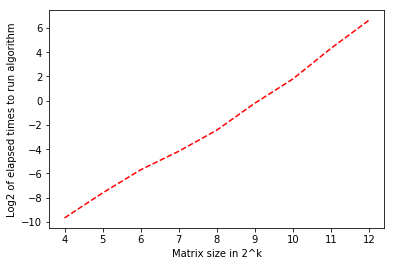

In [48]:
elapsed_times_copy = elapsed_time[4:13]
y_axis = numpy.log2(elapsed_times_copy)
x_axis = range(4,13)
plt.plot(x_axis, y_axis, 'r--')
plt.xlabel("Matrix size in 2^k")
plt.ylabel("Log2 of elapsed times to run algorithm")
plt.show()

The complexity is N^a *(where N is size of matrix; a is order of complexity)*. 
Now our size of matrices are 2^k(k is raised power). Therefore, time taken by matrices will be some power of 2^k and hence, log2(time) will be a factor of k.a *(where k is raised power and a is order of complexity)* If we plot log2(Time) vs k for different values of k, then `ka/k`, i.e. slope of graph will give leading order of complexity

The slope of above plot of **log2(Tk) vs. k** is coming as approximately linear with slope of **2.2**. 

## Problem 3: System of linear equations
### Part A: Solutions for different values of e = 10^i

In [52]:
ex = [1,2,3,4,8,12,16]
e = []
for i in ex:
    e.append(10**(-i))

# Running loop to put different values of e in system of equations
for t in e:
    Row1 = [3,2,1]
    Row2 = [2, 2*t, 2*t]
    Row3 = [1, 2*t, -1*t]
    B = numpy.mat([6, 2 + 4*t, 1 + t])
    B = B.reshape(3,1)
    Matrix = numpy.matrix([Row1, Row2, Row3], dtype = float)
#    print(Matrix)
#    print(B)
 
    mid1, mid2 = eliminate(Matrix, B)
    sol1 = backsub(mid1, mid2)
    
    print("Solution to system of equations for e =", t, ":")
    print(sol1)
    print(" ")

Solution to system of equations for e = 0.1 :
[matrix([[ 1.]]), matrix([[ 1.]]), matrix([[ 1.]])]
 
Solution to system of equations for e = 0.01 :
[matrix([[ 1.]]), matrix([[ 1.]]), matrix([[ 1.]])]
 
Solution to system of equations for e = 0.001 :
[matrix([[ 1.]]), matrix([[ 1.]]), matrix([[ 1.]])]
 
Solution to system of equations for e = 0.0001 :
[matrix([[ 1.]]), matrix([[ 1.]]), matrix([[ 1.]])]
 
Solution to system of equations for e = 1e-08 :
[matrix([[ 1.]]), matrix([[ 1.]]), matrix([[ 1.]])]
 
Solution to system of equations for e = 1e-12 :
[matrix([[ 1.]]), matrix([[ 1.0000111]]), matrix([[ 0.9999778]])]
 
Solution to system of equations for e = 1e-16 :
[matrix([[ 1.]]), matrix([[ 0.7]]), matrix([[ 1.6]])]
 


What is happening above is that our system of equations is independent of values of 'e' and for different
values of `e`, our solution to equations is [1, 1, 1], but this solution is breaking out at e = 10^(-16) where
it is giving [1, 0.7, 1.6]. Although our system looks independent of `e` if we solve manually, we solution reaches to approximation when `e` is 10^(-16)

### Part B: Rounding each computation steps for e = 10^-3

Below, defining ***eliminate_round*** function which rounds all compuations in between steps (round also mentioned in comments)

In [111]:
def eliminate_round(A, v):
    print(A)
    try:
        for i in range(A.shape[0]-1):
            for j in range(A.shape[1]-1-i):
                pivot = A[i, i]
            
                if pivot == 0:
                    swap_index = (numpy.where(A[i+1:,i] != 0)[0][0])+ i + 1

                    temp = A[i].copy()
                    A[i] = A[swap_index]
                    A[swap_index] = temp
                
                    temp2 = v[i].copy()
                    v[i] = v[swap_index]
                    v[swap_index] = temp2
                    
                multi = A[i+j+1, i]/ A[i, i]
            # 1st rounding
                A[i+j+1] = numpy.around((A[i+j+1] - A[i]*multi), 2)  
                print(A)
            # 2nd rounding
                v[i+j+1] = numpy.around((v[i+j+1] - v[i]*multi), 2)            
    
        if A[A.shape[0]-1, A.shape[1]-1] == 0:
            sys.exit("Matrix not full rank, can't solve {Matrix singular}")
    
    except IndexError:
        sys.exit("Couldn't find pivot, non unique solutions")
        
    # Final rounding
    A = numpy.around(A,2)
    v = numpy.around(v,2)
    return A,v

Below, defining ***backsub_round*** which rounds computations in between steps for back-substitution (mentioned in comments)

In [90]:
def backsub_round(A,v):
    n = A.shape[0]
    listx = [0]*n
    listy = [0]*n
    for i in range(1,n+1):
        some_number = 0
        
        for j in range(i):
            some_number = some_number + listx[j]*A[n-i, n-j-1]
            # First rounding
            some_number = round(some_number, 2)
        # Second rounding
        listx[i-1] = round((v[n-i] - some_number)/A[n-i, n-i],2)
        listy[n-i] = round(listx[i-1],2)
    return_list = numpy.around(numpy.vstack((listy[0], listy[1], listy[2])),2)
    return return_list

Now, let's compute out solutions using new xxx_round functions

In [117]:
# Updating equations and making system matrices
x = 10**(-3)
Row1_2 = [3,2,1]
Row2_2 = [2, 2*x, 2*x]
Row3_2 = [1, 2*x, -1*x]
B_2 = numpy.mat([6, 2 + 4*x, 1 + x])
B_2 = B_2.reshape(3,1)
Matrix_2 = numpy.matrix([Row1_2, Row2_2, Row3_2], dtype = float)

# Solving 
mid1_2, mid2_2 = eliminate_round(Matrix_2, B_2)
sol1_2 = backsub_round(mid1_2, mid2_2)
mid1_2
sol1_2

[[  3.00000000e+00   2.00000000e+00   1.00000000e+00]
 [  2.00000000e+00   2.00000000e-03   2.00000000e-03]
 [  1.00000000e+00   2.00000000e-03  -1.00000000e-03]]
[[  3.00000000e+00   2.00000000e+00   1.00000000e+00]
 [  0.00000000e+00  -1.33000000e+00  -6.60000000e-01]
 [  1.00000000e+00   2.00000000e-03  -1.00000000e-03]]
[[ 3.    2.    1.  ]
 [ 0.   -1.33 -0.66]
 [ 0.   -0.66 -0.33]]
[[ 3.    2.    1.  ]
 [ 0.   -1.33 -0.66]
 [ 0.    0.   -0.  ]]


SystemExit: Matrix not full rank, can't solve {Matrix singular}

As oberved above, if we round the calculations to 2 decimal places and send constrains to 3 decimal places 
(by multiplying e by 10^(-3)), we are basically making 2nd and 3rd row of reduced row echelon form same.
That is why, I am getting ***singular matrix*** error. 